# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [1]:
import requests
import urllib.request
import streamlit as st
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

Part 1 - Clean the data and perform some EDA and visualization to get to know the data set.

In [3]:
df = pd.read_csv('./cars_hw.csv', low_memory=False)
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [4]:
df = df.drop(df.columns[0], axis=1) # Dropping 'Unnamed' column

In [10]:
df['Make'].value_counts()

Make
Hyundai          305
Maruti Suzuki    293
Honda             73
Renault           68
Ford              52
Toyota            50
MG Motors         35
Volkswagen        29
Tata              23
Mahindra          18
Kia                8
Chevrolet          6
Skoda              5
Nissan             4
Jeep               4
Datsun             3
Name: count, dtype: int64

In [9]:
df['Body_Type'].value_counts()

Body_Type
hatchback    484
sedan        227
suv          206
muv           38
crossover     21
Name: count, dtype: int64

In [12]:
df['Transmission_Type'].value_counts()

Transmission_Type
Manual       712
Automatic    264
Name: count, dtype: int64

In [15]:
pd.options.display.float_format = '{:,.0f}'.format
price_distribution = df.groupby('Make')[['Price']].describe()
price_distribution

Price                                                    \
              count      mean       std       min       25%       50%   
Make                                                                    
Chevrolet         6   453,500   246,606   267,000   288,500   345,500   
Datsun            3   289,667    10,504   279,000   284,500   290,000   
Ford             52   721,173   140,928   290,000   635,000   707,500   
Honda            73   798,973   266,509   316,000   581,000   785,000   
Hyundai         305   691,892   279,160   248,000   485,000   638,000   
Jeep              4 1,499,500   152,513 1,290,000 1,447,500 1,529,500   
Kia               8 1,614,750   119,057 1,369,000 1,579,000 1,628,500   
MG Motors        35 1,869,457   121,661 1,589,000 1,786,500 1,848,000   
Mahindra         18 1,100,167   175,549   796,000 1,037,000 1,094,500   
Maruti Suzuki   293   588,785   216,020   237,000   411,000   527,000   
Nissan            4   884,250   289,560   475,000   782,500   978,000   
Renault          68   662,574   214,827   287,000   475,000   644,000   
Skoda             5 1,136,000 1,070,175   436,000   466,000   538,000   
Tata             23 1,055,217   557,831   188,000   779,500   869,000   
Toyota           50   800,340   246,690   368,000   526,250   894,000   
Volkswagen       29   605,828   119,831   402,000   542,000   607,000   

                                   
                    75%       max  
Make                               
Chevrolet       537,500   892,000  
Datsun          295,000   300,000  
Ford            787,000 1,066,000  
Honda           915,000 1,537,000  
Hyundai         837,000 1,742,000  
Jeep          1,581,500 1,649,000  
Kia           1,705,750 1,741,000  
MG Motors     1,978,000 2,019,000  
Mahindra      1,157,000 1,465,000  
Maruti Suzuki   764,000 1,163,000  
Nissan        1,079,750 1,106,000  
Renault         801,000 1,164,000  
Skoda         1,299,000 2,941,000  
Tata          1,552,000 2,100,000  
Toyota        1,023,000 1,092,000  
Volkswagen      699,000   790,000

In [16]:
mileage_distribution = df.groupby('Make')[['Mileage_Run']].describe()
mileage_distribution

Mileage_Run                                                 
                    count   mean    std    min    25%    50%    75%    max
Make                                                                      
Chevrolet               6 60,127 15,308 42,222 46,935 61,976 72,229 77,022
Datsun                  3 57,323 15,901 42,187 49,038 55,890 64,891 73,892
Ford                   52 44,728 27,741  6,886 20,392 41,108 68,152 97,902
Honda                  73 41,720 22,886  7,434 20,604 43,992 56,221 94,873
Hyundai               305 46,583 24,900  1,117 25,517 41,443 64,378 99,001
Jeep                    4 49,613  7,724 43,091 44,150 47,656 53,118 60,049
Kia                     8 23,600  7,242 14,077 19,835 22,366 25,978 38,198
MG Motors              35 32,333 13,168  7,339 25,527 32,604 40,739 51,686
Mahindra               18 58,353 15,766 39,894 43,426 58,702 69,159 94,751
Maruti Suzuki         293 38,516 23,528  2,163 19,958 32,454 54,857 99,495
Nissan                  4 16,454 21,546  3,832  4,805  6,663 18,312 48,656
Renault                68 34,424 23,735  4,776 16,313 26,782 56,666 88,547
Skoda                   5 60,318 37,073  9,686 46,103 52,326 93,981 99,495
Tata                   23 23,416 21,998  1,540  8,128 16,123 34,737 92,603
Toyota                 50 34,061 20,846  6,738 14,774 33,394 49,448 73,664
Volkswagen             29 57,142 22,537 20,427 41,757 54,723 81,709 92,227

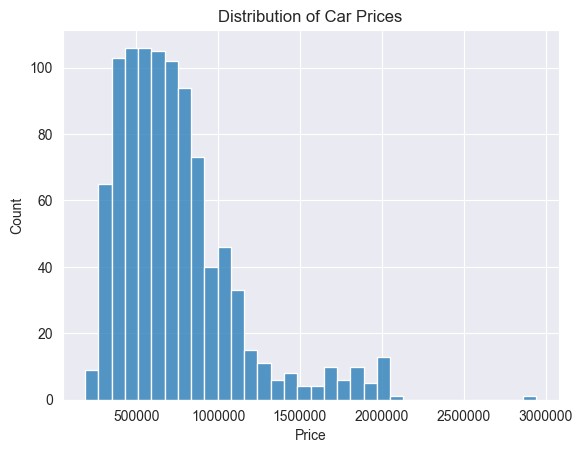

In [19]:
sns.histplot(df['Price'])
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ticklabel_format(style = 'plain', axis = 'x') 
plt.show()

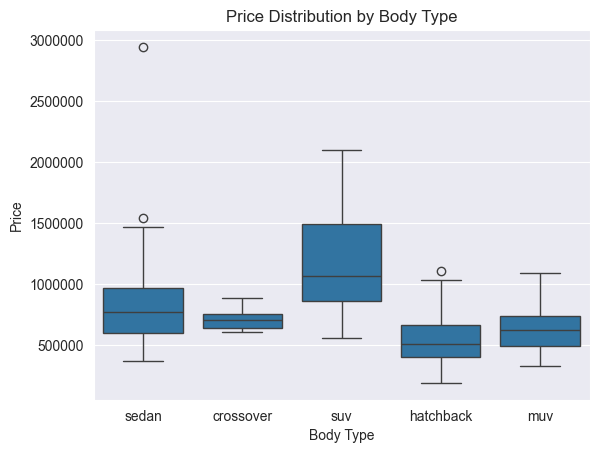

In [20]:
sns.boxplot(data = df, x = 'Body_Type', y = 'Price')
plt.title('Price Distribution by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.ticklabel_format(style = 'plain', axis = 'y') 
plt.show()

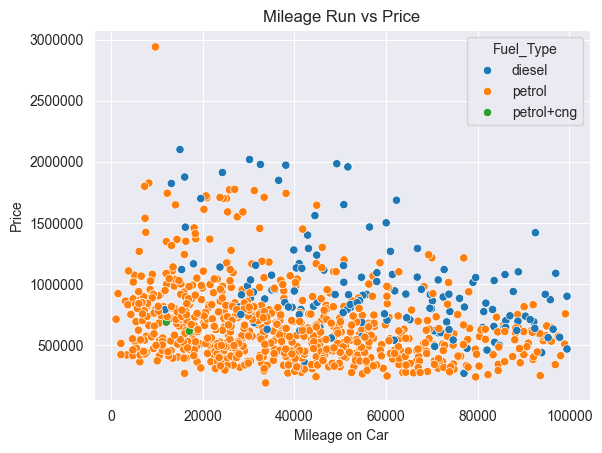

In [21]:
sns.scatterplot(x = 'Mileage_Run', y = 'Price', hue = 'Fuel_Type', data = df)
plt.title('Mileage Run vs Price')
plt.xlabel('Mileage on Car')
plt.ylabel('Price')
plt.ticklabel_format(style = 'plain', axis = 'y') 
plt.show()

Part 2 - Transform your variables, particularly categorical ones, for use in your regression analysis.

In [22]:
categorical = ['Transmission', 'Transmission_Type', 'No_of_Owners', 'Color', 'Make', 'Body_Type', 'Fuel_Type']

y = df['Price']
X = pd.get_dummies(df[categorical], dtype = 'int', drop_first = True)

regression = linear_model.LinearRegression(fit_intercept = True).fit(X, y)

intercept = regression.intercept_
print("Intercept: $" + str(intercept))

results = pd.DataFrame({'variable':regression.feature_names_in_, 'coefficient': regression.coef_})
results

Intercept: $260232.71020690282


,variable,coefficient
0,Transmission_5-Speed,"74,619"
1,Transmission_6-Speed,"235,172"
2,Transmission_7-Speed,"538,673"
3,Transmission_CVT,"201,368"
4,Transmission_Type_Manual,"-56,547"
5,No_of_Owners_2nd,"-80,887"
6,No_of_Owners_3rd,"-187,717"
7,Color_black,"193,098"
8,Color_blue,"255,984"
9,Color_bronze,"134,191"


Part 3 - Implement an ~80/~20 train-test split. Put the test data aside.

In [23]:
y = df['Price']
X = pd.get_dummies(df[categorical], dtype = 'int', drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .2,
                                                    random_state = 100) 

regression = linear_model.LinearRegression(fit_intercept = True).fit(X_train, y_train)
y_hat = regression.predict(X_test)

print('Rsq: ', regression.score(X_test,y_test))
rmse = np.sqrt(np.mean( (y_test - y_hat) ** 2 ))
print('RMSE: ', rmse) 

intercept = regression.intercept_
print("Intercept: $" + str(intercept))

results = pd.DataFrame({'variable': regression.feature_names_in_, 'coefficient': regression.coef_})
results

Rsq:  0.785511353576235
RMSE:  171613.71299031875
Intercept: $194294.42606771807


,variable,coefficient
0,Transmission_5-Speed,"104,141"
1,Transmission_6-Speed,"267,161"
2,Transmission_7-Speed,"587,336"
3,Transmission_CVT,"223,824"
4,Transmission_Type_Manual,"-63,034"
5,No_of_Owners_2nd,"-78,425"
6,No_of_Owners_3rd,"-237,012"
7,Color_black,"235,464"
8,Color_blue,"250,686"
9,Color_bronze,"155,813"


Part 4 - Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?


In [24]:
y = df['Price']
X = pd.get_dummies(df[categorical], dtype = 'int', drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .2,
                                                    random_state = 100) 

regression = linear_model.LinearRegression(fit_intercept = True).fit(X_train, y_train)
y_train_hat = regression.predict(X_train) # training predictor
y_test_hat = regression.predict(X_test) # test predictor

print('Training Rsq: ', regression.score(X_train, y_train))
rmse_train = np.sqrt(np.mean( (y_train - y_train_hat) ** 2 ))
print('Training RMSE: ', rmse_train) 

print('Test Rsq: ', regression.score(X_test, y_test))
rmse_train = np.sqrt(np.mean( (y_test - y_test_hat) ** 2 ))
print('Test RMSE: ', rmse_train) 

intercept = regression.intercept_
print("Intercept: $" + str(intercept))

results = pd.DataFrame({'variable': regression.feature_names_in_, 'coefficient': regression.coef_})
results

Training Rsq:  0.7569962259114917
Training RMSE:  180541.10586995922
Test Rsq:  0.785511353576235
Test RMSE:  171613.71299031875
Intercept: $194294.42606771807


,variable,coefficient
0,Transmission_5-Speed,"104,141"
1,Transmission_6-Speed,"267,161"
2,Transmission_7-Speed,"587,336"
3,Transmission_CVT,"223,824"
4,Transmission_Type_Manual,"-63,034"
5,No_of_Owners_2nd,"-78,425"
6,No_of_Owners_3rd,"-237,012"
7,Color_black,"235,464"
8,Color_blue,"250,686"
9,Color_bronze,"155,813"


The model's performance is pretty consistent across the training and test sets, with comparable $R^2$ values (0.757 and 0.786 respectively) and RMSE values (180,541 and 171,613 respectively). This means that the model generalizes well and is not overfitting, therefore, the linear regression performs well in both training and test accuracy.

Part 5 - Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [25]:
y = np.log(df['Price'])
X = pd.get_dummies(df[categorical], dtype = 'int', drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .2,
                                                    random_state = 100) 

regression_log = linear_model.LinearRegression(fit_intercept = True).fit(X_train, y_train)
y_train_hat_log = regression.predict(X_train)
y_test_hat_log = regression.predict(X_test)

print('Training Rsq: ', regression_log.score(X_train, y_train))
rmse_train_log = np.sqrt(np.mean( (y_train - y_train_hat_log) ** 2 ))
print('Training RMSE: ', rmse_train_log) 

print('Test Rsq: ', regression_log.score(X_test, y_test))
rmse_train_log = np.sqrt(np.mean( (y_test - y_test_hat_log) ** 2 ))
print('Test RMSE: ', rmse_train_log) 

intercept_log = regression_log.intercept_
print("Intercept: $" + str(intercept))

results = pd.DataFrame({'variable': regression_log.feature_names_in_, 'coefficient': regression_log.coef_})
results

Training Rsq:  0.6831417533557413
Training RMSE:  804745.5018151824
Test Rsq:  0.6840180343035456
Test RMSE:  809146.3504782548
Intercept: $194294.42606771807


,variable,coefficient
0,Transmission_5-Speed,0
1,Transmission_6-Speed,0
2,Transmission_7-Speed,1
3,Transmission_CVT,0
4,Transmission_Type_Manual,-0
5,No_of_Owners_2nd,-0
6,No_of_Owners_3rd,-0
7,Color_black,0
8,Color_blue,0
9,Color_bronze,0


In [26]:
y = df['Price'] 
X = pd.get_dummies(df[categorical], dtype = 'int', drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .2,
                                                    random_state = 100) 

poly = PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

names = poly.get_feature_names_out(input_features = X.columns)
X_train_poly = pd.DataFrame(X_train_poly, columns = names)
X_test_poly = pd.DataFrame(X_test_poly, columns = names)

regression_poly = linear_model.LinearRegression(fit_intercept = True).fit(X_train_poly, y_train)
y_train_hat_poly = regression_poly.predict(X_train_poly)
y_test_hat_poly = regression_poly.predict(X_test_poly)

print('Training Rsq: ', regression_poly.score(X_train_poly, y_train))
rmse_train_poly = np.sqrt(np.mean( (y_train - y_train_hat_poly) ** 2 ))
print('Training RMSE: ', rmse_train_poly) 

print('Test Rsq: ', regression_poly.score(X_test_poly, y_test))
rmse_train_poly = np.sqrt(np.mean( (y_test - y_test_hat_poly) ** 2 ))
print('Test RMSE: ', rmse_train_poly) 

intercept_poly = regression_poly.intercept_
print("Intercept: $" + str(intercept_poly))

results = pd.DataFrame({'variable': regression_poly.feature_names_in_, 'coefficient': regression_poly.coef_})
results

Training Rsq:  0.8984720204174774
Training RMSE:  116697.744138854
Test Rsq:  -1.4667995318370334e+24
Test RMSE:  4.487817779341197e+17
Intercept: $6.45158328639873e+17


,variable,coefficient
0,Transmission_5-Speed,"-681,599,799,195,121,792"
1,Transmission_6-Speed,"2,319,237,111,050,627,072"
2,Transmission_7-Speed,"1,847,250,957,451,294,464"
3,Transmission_CVT,"3,821,570,460,097,480,704"
4,Transmission_Type_Manual,"44,885,648,375,608,200"
...,...,...
940,Body_Type_suv Fuel_Type_petrol,"201,332,706,934,721,024"
941,Body_Type_suv Fuel_Type_petrol+cng,0
942,Fuel_Type_petrol^2,"417,249,932,319,573,120"
943,Fuel_Type_petrol Fuel_Type_petrol+cng,0


The simpler log-transformed linear regression model performed better in terms of generalizability. The log-transformed model achieved a training $R^2$ of 0.683 and a test $R^2$ of 0.684. Its RMSE values were 804,746 on the training set and 809,146 on the test set, indicating a consistent performance between training and test data with relatively high errors. In contrast, the polynomial model, which included interactions and quadratic terms, drastically overfitted the data. It achieved a high training $R^2$ of 0.898 and a low training RMSE of 116,698, however, it performed poorly on the test set, with a negative test $R^2$ of -1.467 x $10^{24}$ and a high test RMSE of $4.49 x 10^{17}$. This indicates that the polynomial model fails to generalize and introduces a lot of instability.

Part 6 - Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?

Based on my results, the simplest linear regression model, which used the original data without transformations or interactions, performed the best overall. It achieved a training $R^2$ of 0.757 and a test $R^2$ of 0.786, with RMSE values of 180,541 (training) and 171.613 (test), which indicates that the model generalizes effectively to unseen data without overfitting.

Meanwhile, the log-transformed model, which applied a log transformation to the target variable, underperformed slightly. While the performance was consistent between the training and test data, the model did not improve upon the simpler approach, which means that the transformation did not enhance the fit or reduce error, probably because the original scale already captured the relationships effectively. On the other hand, the polynomial model incorporated interaction terms and quadratic features but performed terribly on the test data, with a negative $R^2$ value and an extremely high RMSE value. This indicates severe overfitting, where the model captured noise in the training data but failed to generalize to unseen data. Additionally, the instability of the model, which was reflected in its extreme coefficient values, showed the importance of careful feature selection when using highly complex models. 